## Importing libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading csv

In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [3]:
train.head(2)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0


In [4]:
test.head(2)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1


## Visualising features

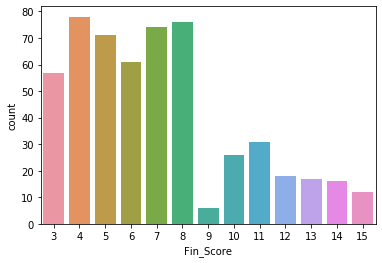

In [5]:
sns.countplot(train["Fin_Score"])

"I observed that for every value of Fin_Score above 8, the value of IsUnderRisk is 1. This is proved below. Similarly other features showed the same trend as well."

In [8]:
train.query('Fin_Score>8')["IsUnderRisk"].all()==1  

True

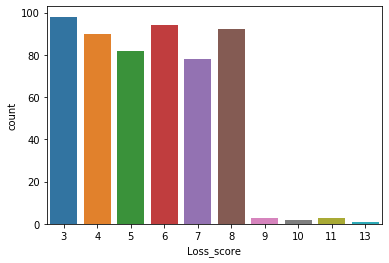

In [9]:
sns.countplot(train["Loss_score"])

In [10]:
train.query('Loss_score>8')["IsUnderRisk"].all()==1

True

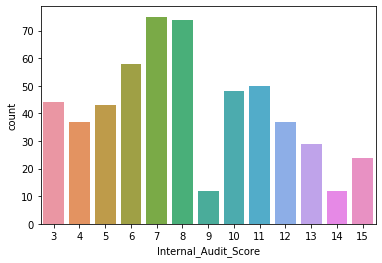

In [11]:
sns.countplot(train["Internal_Audit_Score"])

In [12]:
train.query('Internal_Audit_Score>8')["IsUnderRisk"].all()==1

True

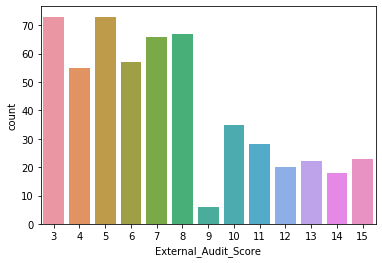

In [13]:
sns.countplot(train["External_Audit_Score"])

In [14]:
train.query('External_Audit_Score>8')["IsUnderRisk"].all()==1

True

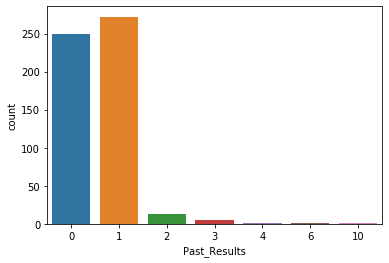

In [15]:
sns.countplot(train["Past_Results"])

In [16]:
train.query('Past_Results>1')["IsUnderRisk"].all()==1

True

I created a column by subtracting the values in Loss_score and Fin_Score columns.

In [17]:
train['fldif']=np.abs(train["Loss_score"]-train["Fin_Score"])
test['fldif']=np.abs(test["Loss_score"]-test["Fin_Score"])

In [18]:
train.head(2)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk,fldif
0,2,8.032,14,8,3,6,0,1,3
1,31,77.730,8,3,3,8,1,0,5


This column showed a similar type of trend as well.

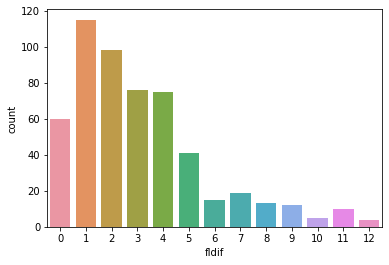

In [19]:
sns.countplot(train["fldif"])

In [20]:
train.query('fldif>5')['IsUnderRisk'].all()==1

True

In [21]:
y=train["IsUnderRisk"]

In [22]:
train=train.drop("IsUnderRisk",axis=1)

In [23]:
# droplist=[]
# train=train.drop(droplist,axis=1)
# test=test.drop(droplist,axis=1)

## Splitting train into X_test and Y_test

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=0)


In [25]:
# from xgboost import XGBClassifier
# classifier = XGBClassifier()
# classifier.fit(X_train,y_train)

In [26]:
# from sklearn.ensemble import RandomForestClassifier
# classifier=RandomForestClassifier()
# classifier.fit(X_train,y_train)

In [27]:
# from lightgbm import LGBMClassifier
# classifier = LGBMClassifier()
# classifier.fit(X_train,y_train)

In [28]:
from catboost import Pool, CatBoostClassifier
classifier = CatBoostClassifier(
    depth= 3, iterations= 853, learning_rate= 0.01
)
classifier.fit(X_train,y_train)

0:	learn: 0.6822699	total: 109ms	remaining: 1m 33s
1:	learn: 0.6712000	total: 111ms	remaining: 47.4s
2:	learn: 0.6603006	total: 113ms	remaining: 32s
3:	learn: 0.6495699	total: 115ms	remaining: 24.4s
4:	learn: 0.6398866	total: 116ms	remaining: 19.7s
5:	learn: 0.6310636	total: 118ms	remaining: 16.7s
6:	learn: 0.6221142	total: 120ms	remaining: 14.5s
7:	learn: 0.6130651	total: 122ms	remaining: 12.9s
8:	learn: 0.6046341	total: 123ms	remaining: 11.6s
9:	learn: 0.5959170	total: 125ms	remaining: 10.5s
10:	learn: 0.5872006	total: 126ms	remaining: 9.68s
11:	learn: 0.5801573	total: 128ms	remaining: 8.97s
12:	learn: 0.5721809	total: 129ms	remaining: 8.36s
13:	learn: 0.5648151	total: 131ms	remaining: 7.84s
14:	learn: 0.5575096	total: 132ms	remaining: 7.38s
15:	learn: 0.5511392	total: 134ms	remaining: 6.98s
16:	learn: 0.5465995	total: 135ms	remaining: 6.63s
17:	learn: 0.5396654	total: 136ms	remaining: 6.33s
18:	learn: 0.5355399	total: 138ms	remaining: 6.07s
19:	learn: 0.5296667	total: 140ms	remainin

361:	learn: 0.2631069	total: 301ms	remaining: 408ms
362:	learn: 0.2630337	total: 303ms	remaining: 409ms
363:	learn: 0.2627880	total: 305ms	remaining: 409ms
364:	learn: 0.2627468	total: 306ms	remaining: 409ms
365:	learn: 0.2626216	total: 308ms	remaining: 410ms
366:	learn: 0.2625597	total: 311ms	remaining: 411ms
367:	learn: 0.2623781	total: 313ms	remaining: 412ms
368:	learn: 0.2621801	total: 315ms	remaining: 413ms
369:	learn: 0.2619962	total: 317ms	remaining: 414ms
370:	learn: 0.2618783	total: 319ms	remaining: 414ms
371:	learn: 0.2617018	total: 320ms	remaining: 414ms
372:	learn: 0.2616133	total: 322ms	remaining: 415ms
373:	learn: 0.2614748	total: 324ms	remaining: 416ms
374:	learn: 0.2613008	total: 327ms	remaining: 416ms
375:	learn: 0.2612014	total: 328ms	remaining: 417ms
376:	learn: 0.2609896	total: 330ms	remaining: 417ms
377:	learn: 0.2608144	total: 332ms	remaining: 418ms
378:	learn: 0.2607379	total: 334ms	remaining: 418ms
379:	learn: 0.2605950	total: 336ms	remaining: 418ms
380:	learn: 

621:	learn: 0.2256032	total: 478ms	remaining: 178ms
622:	learn: 0.2254572	total: 479ms	remaining: 177ms
623:	learn: 0.2252942	total: 480ms	remaining: 176ms
624:	learn: 0.2252161	total: 481ms	remaining: 175ms
625:	learn: 0.2250109	total: 482ms	remaining: 175ms
626:	learn: 0.2248284	total: 482ms	remaining: 174ms
627:	learn: 0.2247405	total: 483ms	remaining: 173ms
628:	learn: 0.2247056	total: 483ms	remaining: 172ms
629:	learn: 0.2245549	total: 484ms	remaining: 171ms
630:	learn: 0.2244503	total: 484ms	remaining: 170ms
631:	learn: 0.2243431	total: 484ms	remaining: 169ms
632:	learn: 0.2243212	total: 485ms	remaining: 168ms
633:	learn: 0.2242639	total: 485ms	remaining: 168ms
634:	learn: 0.2241096	total: 486ms	remaining: 167ms
635:	learn: 0.2240046	total: 486ms	remaining: 166ms
636:	learn: 0.2239066	total: 486ms	remaining: 165ms
637:	learn: 0.2237900	total: 487ms	remaining: 164ms
638:	learn: 0.2237477	total: 487ms	remaining: 163ms
639:	learn: 0.2236367	total: 488ms	remaining: 162ms
640:	learn: 

In [29]:
y_pred=classifier.predict_proba(X_test)

In [30]:
y_pred=pd.DataFrame(y_pred, index = X_test.index.copy())

In [31]:
#Accuracy
from sklearn.metrics import log_loss
print(log_loss(y_test,y_pred))

0.30185079327001735


Now since we know that for certain values the risk is going to be 1, we will make the probability of zero in those columns 0 and same for one.

In [32]:
X_test['zero']=y_pred[0]
X_test["one"]=y_pred[1]

In [33]:
X_test.head(2)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,fldif,zero,one
103,2,64.536,6,4,7,5,0,2,0.885875,0.114125
179,9,75.588,5,5,8,4,0,4,0.921738,0.078262


In [34]:
X_test['one'][X_test['Internal_Audit_Score' ]>8 ] = 1
X_test['one'][X_test['Loss_score' ]>8 ] = 1
X_test['one'][X_test['Fin_Score'] >8 ] = 1
X_test['one'][X_test['External_Audit_Score'] >8 ] = 1
X_test['one'][X_test['fldif' ]>5 ] = 1
X_test['one'][X_test['Past_Results'] >1 ] = 1

X_test['zero'][X_test['Internal_Audit_Score' ]>8 ] = 0
X_test['zero'][X_test['Loss_score' ]>8 ] =0
X_test['zero'][X_test['Fin_Score'] >8 ] = 0
X_test['zero'][X_test['External_Audit_Score'] >8 ] = 0
X_test['zero'][X_test['fldif' ]>5 ] = 0
X_test['zero'][X_test['Past_Results'] >1 ] = 0


In [35]:
y_pred[0]=X_test['zero']
y_pred[1]=X_test['one']

In [36]:
y_pred.head()

,0,1
103,0.885875,0.114125
179,0.921738,0.078262
474,0.432347,0.567653
345,0.878199,0.121801
132,0.000000,1.000000


## Improved accuracy

In [37]:
#Accuracy
from sklearn.metrics import log_loss
print(log_loss(y_test,y_pred))

0.28917656882637033


## Making submission for test set

In [38]:
y_p=classifier.predict_proba(test)

In [39]:
ans=y_p
ans=pd.DataFrame(ans)


In [40]:
test['zero']=ans[0]
test["one"]=ans[1]

In [41]:
test['one'][test['Internal_Audit_Score' ]>8 ] = 1
test['one'][test['Loss_score' ]>8 ] = 1
test['one'][test['Fin_Score'] >8 ] = 1
test['one'][test['External_Audit_Score'] >8 ] = 1
test['one'][test['fldif' ]>5 ] = 1
test['one'][test['Past_Results'] >1 ] = 1

test['zero'][test['Internal_Audit_Score' ]>8 ] = 0
test['zero'][test['Loss_score' ]>8 ] =0
test['zero'][test['Fin_Score'] >8 ] = 0
test['zero'][test['External_Audit_Score'] >8 ] = 0
test['zero'][test['fldif' ]>5 ] = 0
test['zero'][test['Past_Results'] >1 ] = 0


In [42]:
ans[0]=test['zero']
ans[1]=test['one']

In [43]:
ans.head()

,0,1
0,0.000000,1.000000
1,0.000000,1.000000
2,0.894301,0.105699
3,0.000000,1.000000
4,0.225298,0.774702


In [44]:
ans.to_excel('pakoda.xlsx',index=False)